In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.fftpack as fp
from math import sqrt,exp

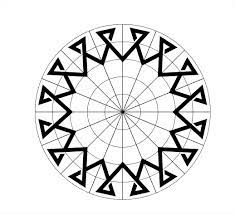

In [ ]:
img=cv2.imread('csym.jpg')
cv2_imshow(img)

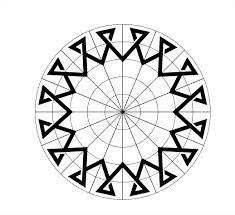

(215, 235)

In [ ]:
img.shape
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
[m,n]=gray_img.shape
m,n

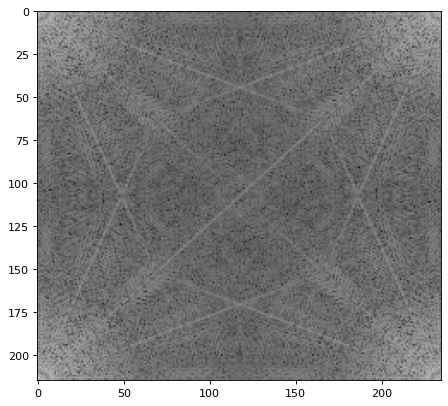

In [ ]:
img_fft=np.fft.fft2(gray_img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_fft)), cmap='gray')

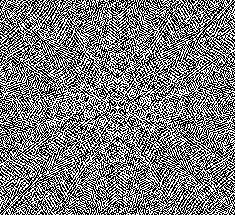

In [ ]:
img_fftshift=np.fft.fftshift(img_fft)
cv2_imshow(img_fftshift)

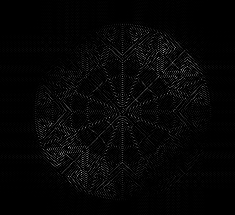

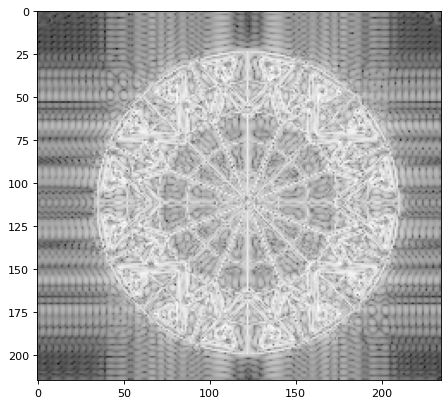

In [ ]:
crow, ccol = m // 2, n // 2
img_fftshift[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0
img_Ifft=np.fft.ifft2(img_fftshift)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_Ifft)), cmap='gray');
cv2_imshow(img_Ifft)

In [ ]:
f_ishift = np.fft.ifftshift(img_fftshift)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)

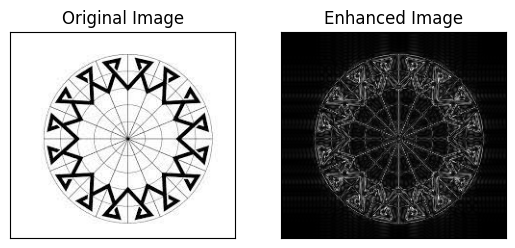

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(image_back, cmap='gray')
plt.title('Enhanced Image')
plt.xticks([]), plt.yticks([])

plt.show()

<ipython-input-71-041a68fabbfe>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  J[(x,y)]=img_fftshift[(x,y)]


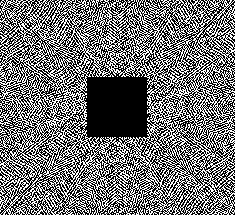

In [ ]:
cuttoff=5
J=np.zeros([m,n])
for x in range (m):
  for y in range (n):
    distance=np.sqrt((x-m/2)**2+(y-n/2)**2)
    if distance > cuttoff:
     J[(x,y)]=img_fftshift[(x,y)]
cv2_imshow(J)

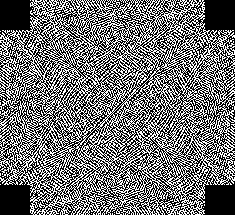

In [ ]:
img_Ifftshift=np.fft.ifftshift(J)
cv2_imshow(img_Ifftshift)

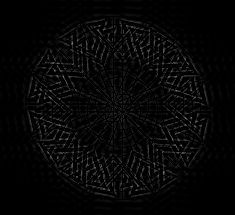

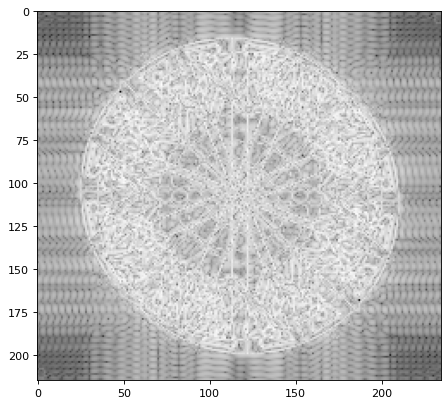

In [ ]:
#HIGH PASS
img_Ifft=np.fft.ifft2(img_Ifftshift)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_Ifft)), cmap='gray');
cv2_imshow(img_Ifft)

In [ ]:
m, n = img.shape[:2]

cutoff = 5

center_x, center_y = m // 2, n // 2

J = np.zeros([m, n], dtype=np.complex64)

for x in range(m):
    for y in range(n):
        distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
        if distance > cutoff:
            J[x, y] = img_fftshift[x, y]

<ipython-input-75-5fcfb5719e0e>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(J)), cmap='gray');


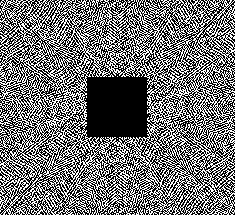

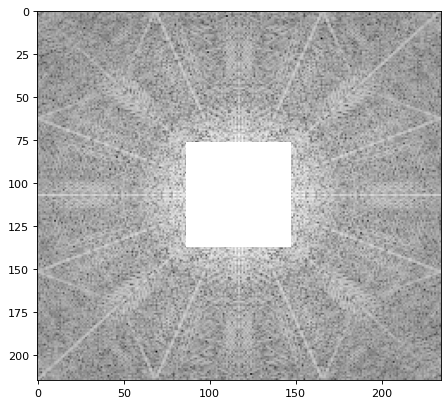

In [ ]:
# Display J without inversion
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(J)), cmap='gray');
cv2_imshow(J)

<ipython-input-76-b99df5fd616d>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(img_Ifftshift)), cmap='gray');


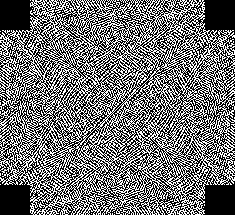

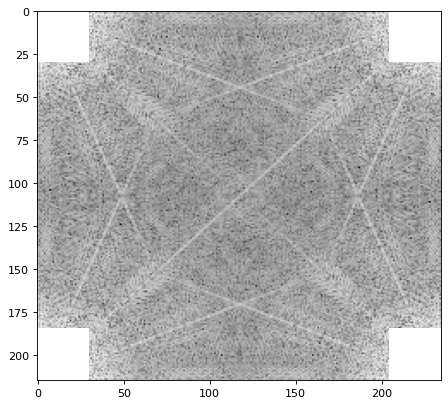

In [ ]:
# Perform inverse FFT shift
img_Ifftshift = np.fft.ifftshift(J)

# Display img_Ifftshift without inversion
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_Ifftshift)), cmap='gray');
cv2_imshow(img_Ifftshift)

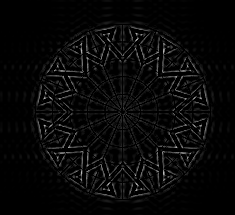

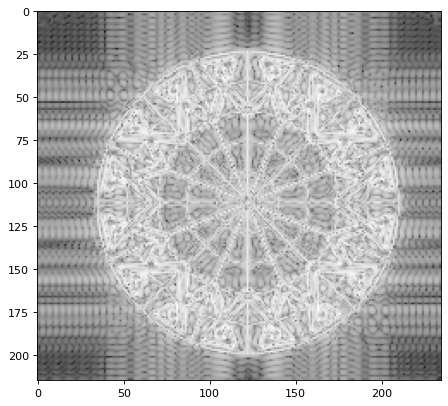

In [ ]:
# Perform inverse FFT
img_Ifft = np.fft.ifft2(img_Ifftshift)

# Display magnitude of the inverse FFT
img_Ifft=np.fft.ifft2(img_Ifftshift)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(img_Ifft)), cmap='gray');
cv2_imshow(img_Ifft)

In [ ]:
# https://github.com/adenarayana

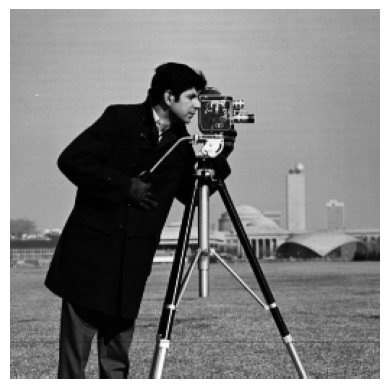

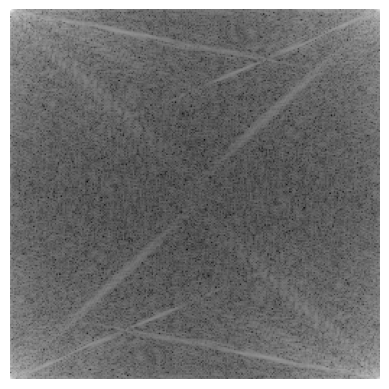

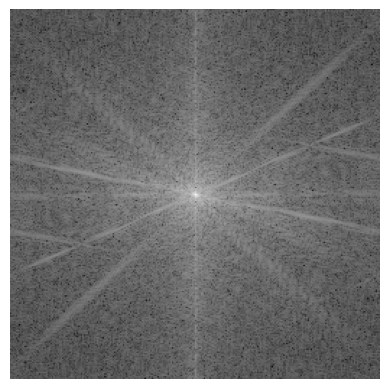

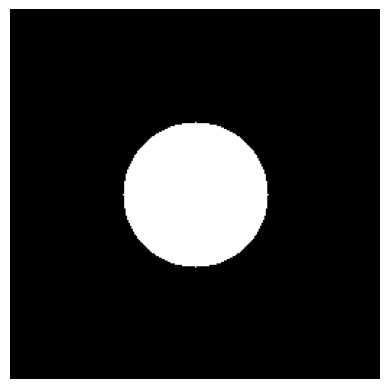

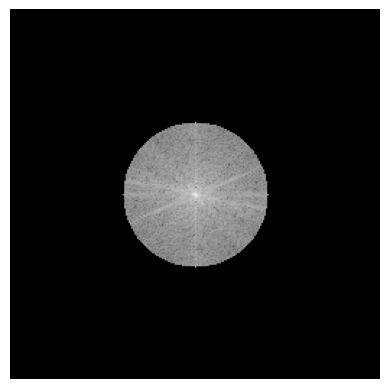

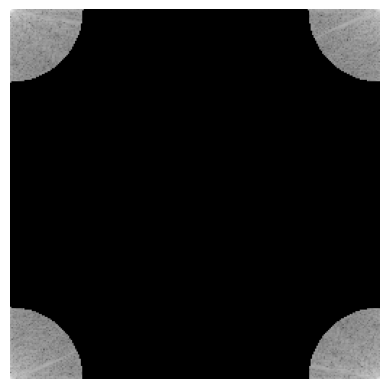

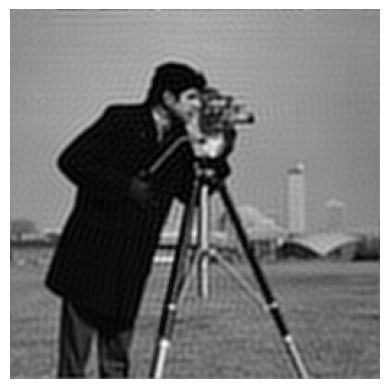

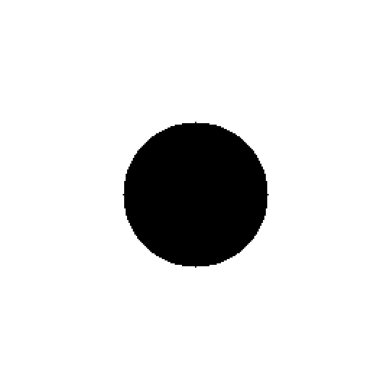

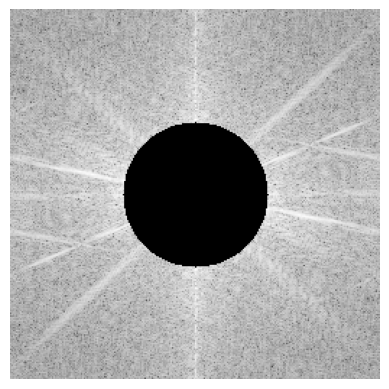

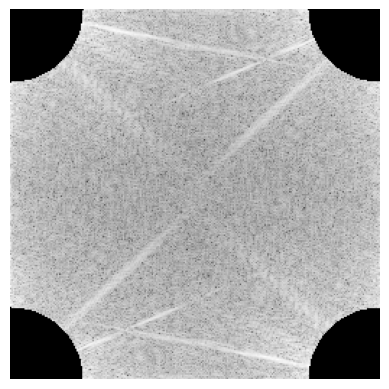

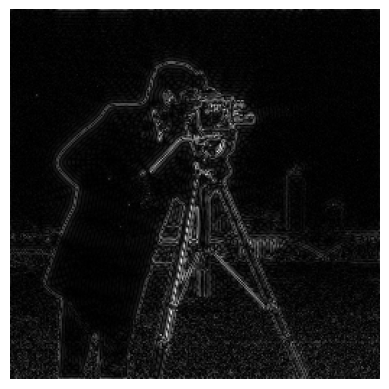

In [ ]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# original image
f = cv2.imread('cameraman.tif',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),
           cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),
           cmap='gray')
plt.axis('off')
plt.show()

# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),
           cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),
           cmap='gray')
plt.axis('off')
plt.show()

# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

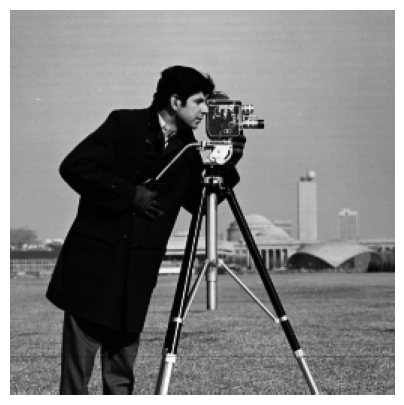

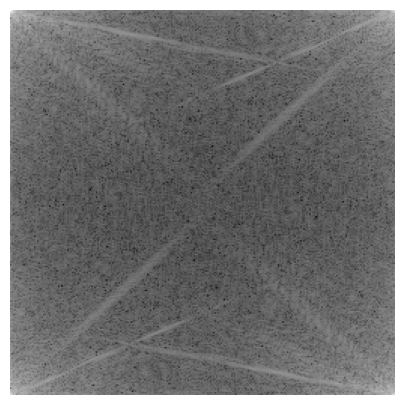

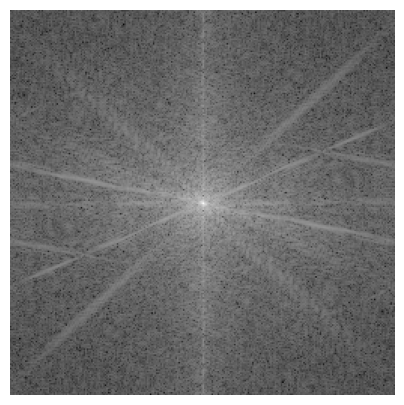

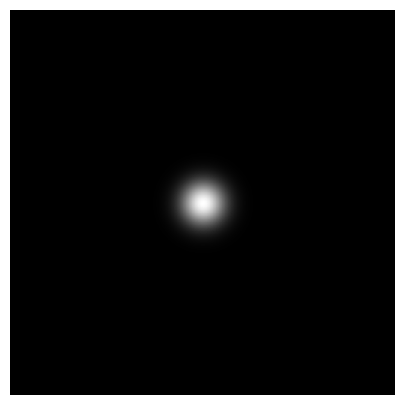

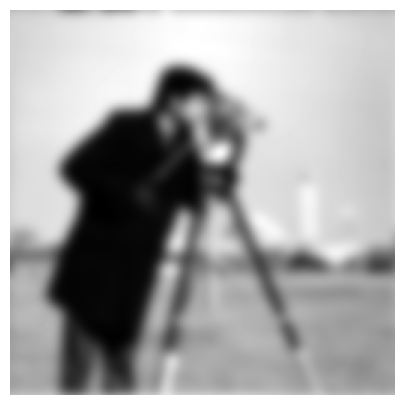

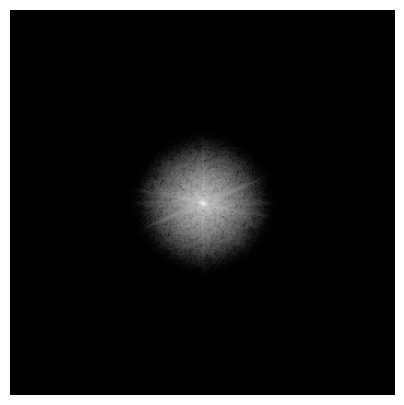

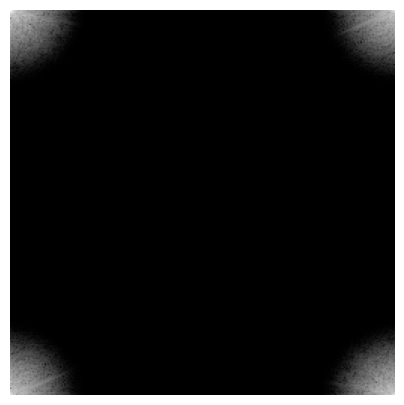

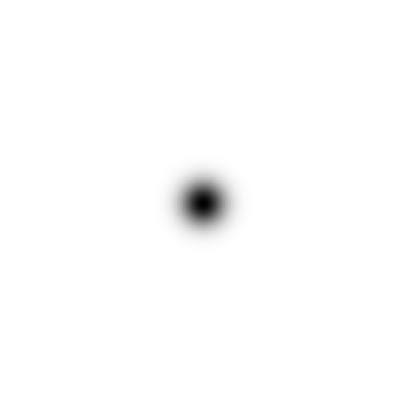

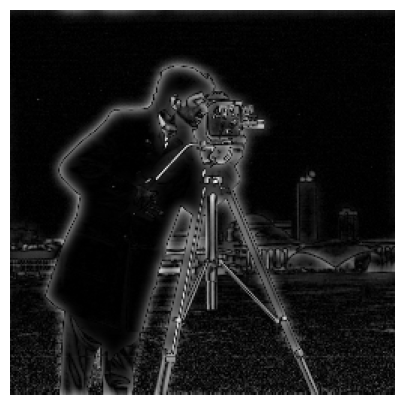

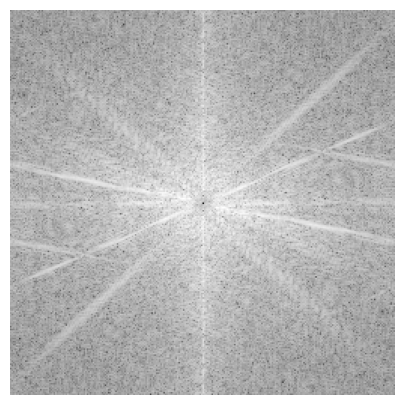

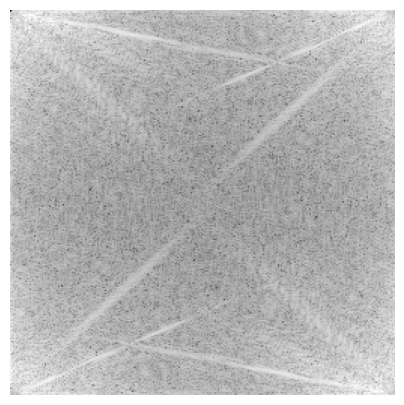

In [ ]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image f
f = cv2.imread('cameraman.tif',0)

plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()



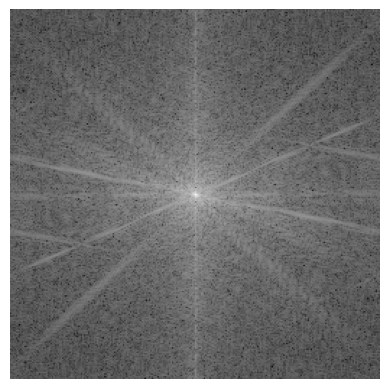

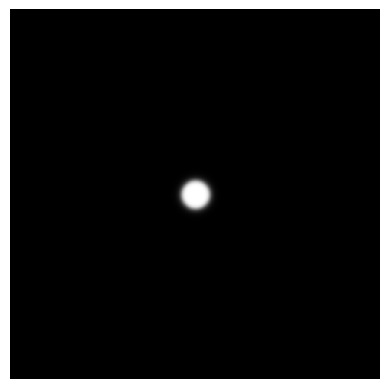

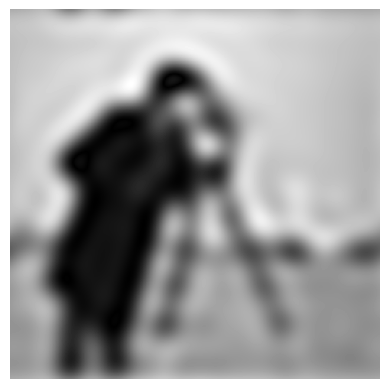

<ipython-input-81-636b48b4b227>:47: RuntimeWarning: divide by zero encountered in scalar divide
  HPF[u,v] = 1 / (1 + (D0/D)**n)


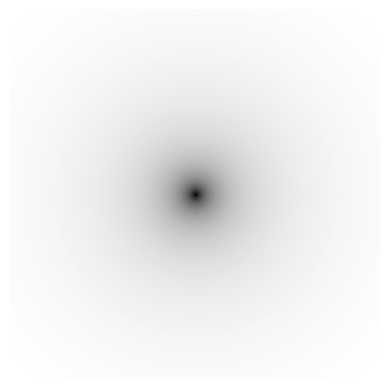

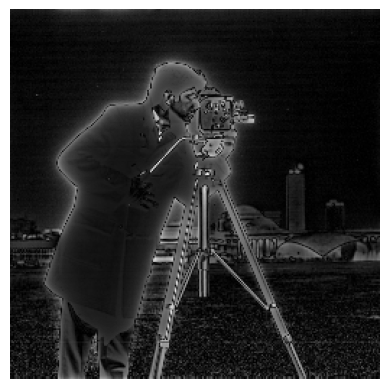

In [ ]:
# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image
f = cv2.imread('cameraman.tif',0)

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)

plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()